In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10,6)

## Week 9: OpenStreetMap, Urban Networks, and Interactive Web Maps
Oct 31, 2019

<img src="https://media.giphy.com/media/3oriNYMXEh2K5l4D9C/giphy.gif"></img>

## MUSA Master Class Nov 15

Featuring Tyler Morgan-Hall on 3D Mapping and Dataviz in R 

[Event Link](https://www.eventbrite.com/e/musamasterclass-featuring-tyler-morgan-wall-3d-mapping-and-dataviz-in-r-tickets-74481308599)


In [3]:
%%html 

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">this halloween, try exploring your data... in the dark 😱<br><br>made entirely with <a href="https://twitter.com/hashtag/rstats?src=hash&amp;ref_src=twsrc%5Etfw">#rstats</a> <a href="https://twitter.com/hashtag/rayshader?src=hash&amp;ref_src=twsrc%5Etfw">#rayshader</a> <a href="https://twitter.com/hashtag/rayrender?src=hash&amp;ref_src=twsrc%5Etfw">#rayrender</a> <a href="https://twitter.com/hashtag/dataviz?src=hash&amp;ref_src=twsrc%5Etfw">#dataviz</a> <a href="https://t.co/HhojoBhLvt">pic.twitter.com/HhojoBhLvt</a></p>&mdash; Tyler Morgan-Wall (@tylermorganwall) <a href="https://twitter.com/tylermorganwall/status/1189165559046430721?ref_src=twsrc%5Etfw">October 29, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

## The final project

https://github.com/MUSA-620-Fall-2019/final-project

## Today: OpenStreetMap (OSM)

- Two tools that make working with OSM data very easy
- What kind of questions can we answer?
    - Street orientations 
    - Mapping event points to streets: car crashes
    - Mapping amenities
    - Network-constrained distances: accessibility

## OSM: what is it?

- Collaborative mapping
- A free editable map of the World
- Sort of like Wikipedia for maps

**Great source of data: street networks and a wealth of amenity information**

https://www.openstreetmap.org

## Working with OSM data

- Raw data is very messy
- Two relatively new, amazing Python packages greatly simply the process
- Related, but complementary features    
    - **OSMnx:** downloading and manipulating streets as networks
    - **Pandana:** networks focused on accessibility of amenities
    
**Related:** interactive web maps in Python

## Part 1: OSMnx

Several key features: 

- Downloading political boundaries for cities, states, countries, etc
- Downloading street networks
- Analyzing networks: routing, visualization, statistics

  - [GitHub](https://github.com/gboeing/osmnx)
  - [Introductory Blog Post](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [Jupyter Notebook Examples](https://github.com/gboeing/osmnx-examples/tree/master/notebooks)
  - [Documentation](https://osmnx.readthedocs.io)

In [4]:
import osmnx as ox

## Getting OSM shapefiles

Key function: `gdf_from_place()`

**Important: Be careful to pass the right place name that OSM needs**

In [5]:
philly = ox.gdf_from_place('Philadelphia, PA, USA')
philly.head()

geometry  \
0  POLYGON ((-75.28030 39.97500, -75.28022 39.974...   

                                          place_name  bbox_north  bbox_south  \
0  Philadelphia, Philadelphia County, Pennsylvani...   40.137959   39.867005   

   bbox_east  bbox_west  
0 -74.955831 -75.280298

We can plot it just like any other GeoDataFrame

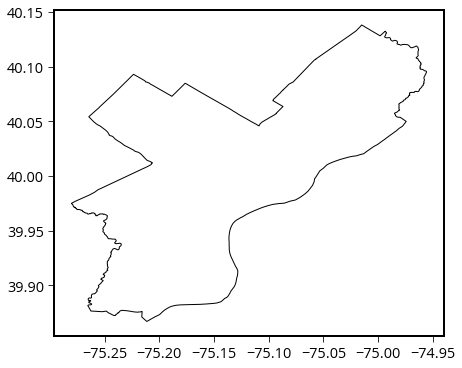

In [6]:
philly.plot(facecolor='none', edgecolor='black')

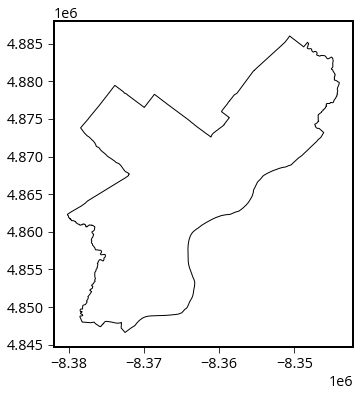

In [7]:
# or project it to Web Mercator first
philly.to_crs(epsg=3857).plot(facecolor='none', edgecolor='black') 

## Projecting and plotting with OSMnx

Key functions: 
- `project_gdf()`: automatically projects to Universal Transverse Mercator (UTM)
- `plot_shape()`

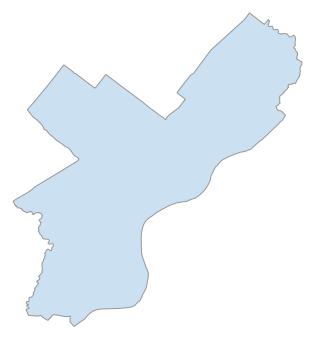

In [8]:
# an automatic, nice looking plot
ox.plot_shape(ox.project_gdf(philly));

We can get the boundary for anything identified as a "place" by OSM

In [9]:
# some examples
place1 = ox.gdf_from_place('Manhattan, New York City, New York, USA')
place2 = ox.gdf_from_place('Miami-Dade County, Florida')
place3 = ox.gdf_from_place('Florida, USA')
place4 = ox.gdf_from_place('Spain')

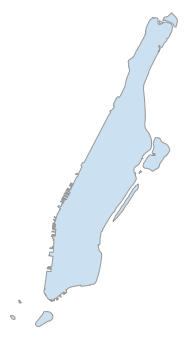

In [10]:
ox.plot_shape(ox.project_gdf(place1));

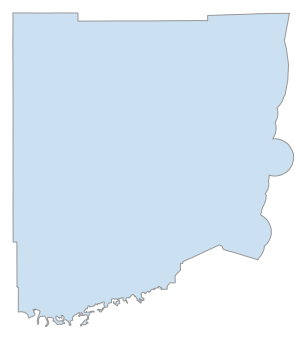

In [11]:
ox.plot_shape(ox.project_gdf(place2));

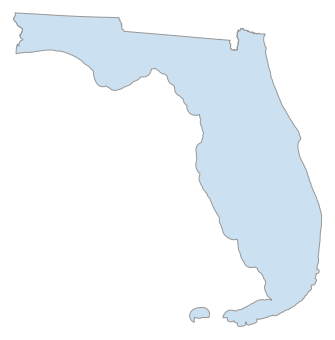

In [12]:
ox.plot_shape(ox.project_gdf(place3));

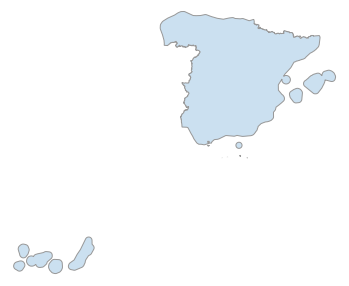

In [13]:
ox.plot_shape(ox.project_gdf(place4));

## Downloading street networks

Key functions: `graph_from_*` 

Can downloaded street networks using input:
  - bounding box (be careful of the lat/lng order)
  - address
  - place name
  - polygon
  - point

### Street network around an address

Get streets within 500 meters of the center of Northern Liberties

In [14]:
G = ox.graph_from_address("Northern Liberties, Philadelphia, PA", 
                          distance=500)

Project and plot it:

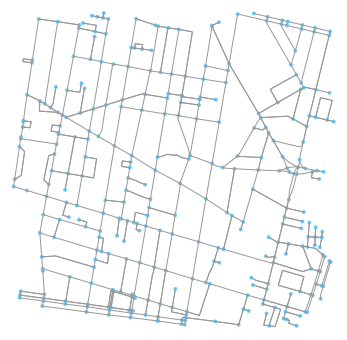

In [15]:
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected);

Remove the blue nodes:

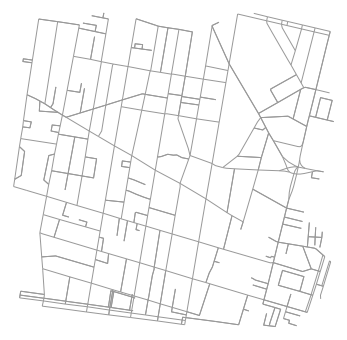

In [16]:
ox.plot_graph(G_projected, node_size=0);

Let's zoom out to 2,000 meters. This will take a little longer.

In [17]:
G = ox.graph_from_address("Northern Liberties, Philadelphia, PA", 
                          distance=2000)
G_projected = ox.project_graph(G)

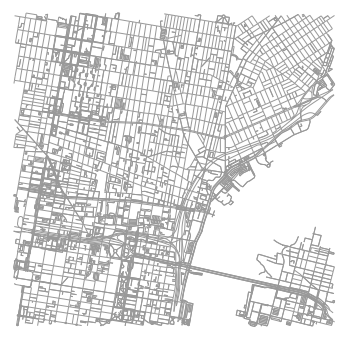

In [18]:
ox.plot_graph(G_projected, node_size=0);

### Getting different network types

- `drive` - get drivable public streets (but not service roads)
- `drive_service` - get drivable streets, including service roads
- `walk` - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
- `bike` - get all streets and paths that cyclists can use
- `all` - download all non-private OSM streets and paths
- `all_private` - download all OSM streets and paths, including private-access ones (default)

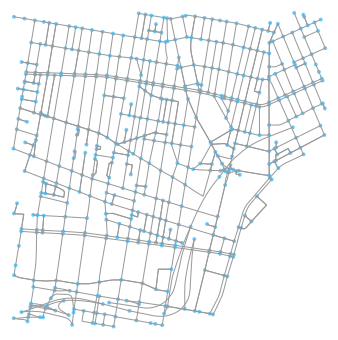

In [19]:
# the "drive" network
G = ox.graph_from_address("Northern Liberties, Philadelphia, PA", 
                          network_type='drive')
ox.plot_graph(G);

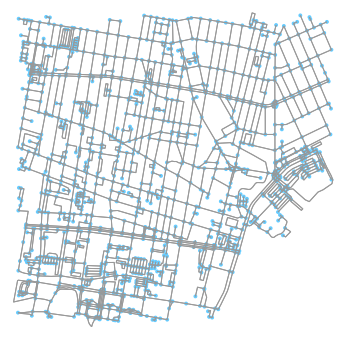

In [20]:
# the "walk" network
G = ox.graph_from_address("Northern Liberties, Philadelphia, PA", 
                           network_type='walk')
ox.plot_graph(ox.project_graph(G));

### Street network within a place boundary

Use `graph_from_place()` to get the streets within a specific OSM place.

**Note: the place query has to be resolved by OSM.**

In [21]:
berkeley = ox.graph_from_place("Berkeley, California", 
                               network_type='drive')

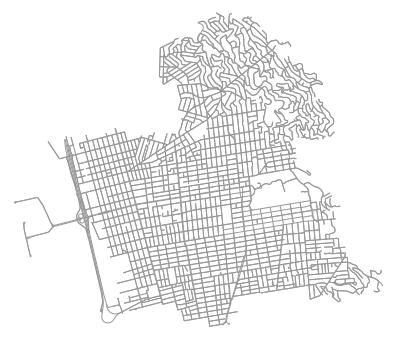

In [22]:
ox.plot_graph(ox.project_graph(berkeley), node_size=0);

### Streets within a specific polygon

**Example:** all streets within Northern Liberties and Fishtown

### First, let's wrangle some Zillow boundaries


In [34]:
import geopandas as gpd
import esri2gpd

In [35]:
url = "https://services.arcgis.com/fLeGjb7u4uXqeF9q/ArcGIS/rest/services/Philly_Neighborhoods/FeatureServer/0"
zillow = (
    esri2gpd.get(url, fields=["MAPNAME"])
    .rename(columns={"MAPNAME": "neighborhood"})
)

In [36]:
zillow.head()

geometry   neighborhood
0  POLYGON ((-75.06773 40.00541, -75.06834 40.006...     Bridesburg
1  POLYGON ((-75.01560 40.09488, -75.01827 40.097...      Bustleton
2  POLYGON ((-75.18848 40.07274, -75.18811 40.072...     Cedarbrook
3  POLYGON ((-75.21221 40.08604, -75.21230 40.086...  Chestnut Hill
4  POLYGON ((-75.18479 40.02838, -75.18548 40.028...     East Falls

Trim to Fishtown and Northern Liberties

In [37]:
sel = zillow['neighborhood'].isin(['Fishtown - Lower Kensington', 'Northern Liberties'])
zillow = zillow.loc[sel]

In [38]:
zillow.head()

geometry  \
86  POLYGON ((-75.12718 39.96087, -75.12570 39.961...   
88  POLYGON ((-75.12718 39.96087, -75.13048 39.966...   

                   neighborhood  
86  Fishtown - Lower Kensington  
88           Northern Liberties

If you like OSMnx's plotting better than the GeoPandas plotting, you can use it on any GeoDataFrame

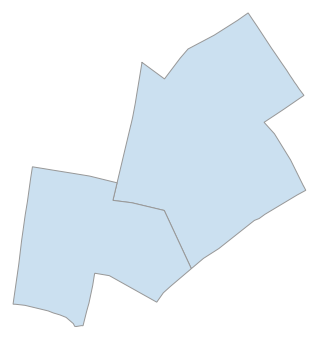

In [39]:
ox.plot_shape(zillow.to_crs(epsg=3857));

### Extract streets within these polygons

- Take the union of the polygons: `unary_union`
- Use `ox.graph_from_polygon()`

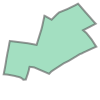

In [42]:
nolibs_fishtown = zillow.geometry.unary_union
nolibs_fishtown

In [43]:
# get the graph
G_nolibs_fishtown = ox.graph_from_polygon(nolibs_fishtown, 
                                          network_type='drive')

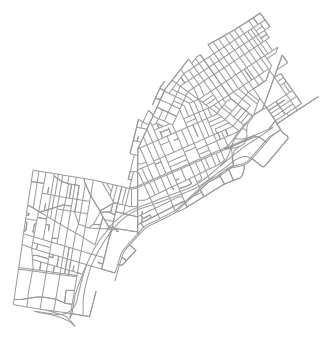

In [44]:
# viola!
ox.plot_graph(ox.project_graph(G_nolibs_fishtown), node_size=0);

We could also use `unary_union.convex_hull`. This will be an encompassing polygon around any set of geometries.

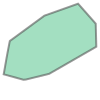

In [45]:
zillow.geometry.unary_union.convex_hull

## Converting from a graph to a GeoDataFrame

Key function: `ox.graph_to_gdfs()`

Can get a GeoDataFrame for both the nodes (points) and edges (lines)

In [46]:
# only get the edges
nolibs_edges = ox.graph_to_gdfs(G_nolibs_fishtown, 
                                edges=True, nodes=False)


In [47]:
# we have lots of data associated with each edge!
nolibs_edges.head()

u          v  key                   osmid               name  \
0  109729430  109729453    0                12109175   North 5th Street   
1  109729430  109729453    1                49961130   North 5th Street   
2  109729453  109729801    0                49961130   North 5th Street   
3  109729453  109729430    0                12109175   North 5th Street   
4  109729699  109811674    0  [424804073, 121643778]  Callowhill Street   

       highway  oneway   length  \
0  residential   False  117.685   
1     tertiary    True   97.779   
2     tertiary    True   32.185   
3  residential   False  117.685   
4        trunk    True  135.860   

                                            geometry lanes bridge  ref  \
0  LINESTRING (-75.14637 39.96458, -75.14655 39.9...   NaN    NaN  NaN   
1  LINESTRING (-75.14637 39.96458, -75.14627 39.9...   NaN    NaN  NaN   
2  LINESTRING (-75.14617 39.96544, -75.14609 39.9...   NaN    NaN  NaN   
3  LINESTRING (-75.14617 39.96544, -75.14637 39.9...   NaN    NaN  NaN   
4  LINESTRING (-75.14724 39.95781, -75.14739 39.9...     5    NaN  NaN   

  maxspeed  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

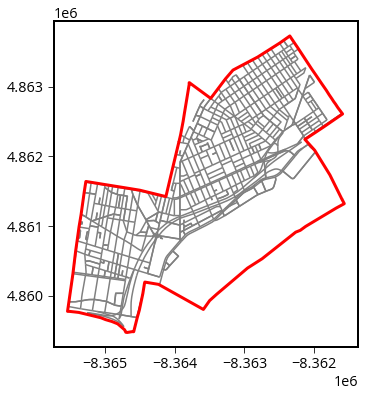

In [48]:
# plot it like any old GeoDataFrame
ax = nolibs_edges.to_crs(epsg=3857).plot(color='gray')

# add the neighborhood boundaries
boundary = gpd.GeoSeries([nolibs_fishtown], crs={'init':'epsg:4326'})
boundary.to_crs(epsg=3857).plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, zorder=2);

## What can we do with the graph?

- Network-based statistics
- Routing
- Street orientations
- Visualizing crashes

And much more: see the [OSMnx repository of Jupyter notebook examples](https://github.com/gboeing/osmnx-examples/tree/master/notebooks)

## Network statistics

Two functions: 
- `ox.basic_stats()`
- `ox.extended_stats()`

In [49]:
ox.extended_stats(G_nolibs_fishtown).keys()

dict_keys(['avg_neighbor_degree', 'avg_neighbor_degree_avg', 'avg_weighted_neighbor_degree', 'avg_weighted_neighbor_degree_avg', 'degree_centrality', 'degree_centrality_avg', 'clustering_coefficient', 'clustering_coefficient_avg', 'clustering_coefficient_weighted', 'clustering_coefficient_weighted_avg', 'pagerank', 'pagerank_max_node', 'pagerank_max', 'pagerank_min_node', 'pagerank_min'])

## Finding the shortest route

We can use the `networkx` package to do network-based calculations

In [50]:
# two points in Northern Liberties / Fishtown
spring_garden_station = (39.960421, -75.140340)
frankford_hall = (39.969381, -75.134599)

# get the nearest network node to each point
orig_node = ox.get_nearest_node(G_nolibs_fishtown, 
                                spring_garden_station) 
dest_node = ox.get_nearest_node(G_nolibs_fishtown, 
                                frankford_hall) 

In [51]:
import networkx as nx

In [52]:
# get the shortest path --> just a list of node IDs
route = nx.shortest_path(G_nolibs_fishtown, 
                         orig_node, dest_node, 
                         weight='length')
route

[110156961,
 110156976,
 110240102,
 110240110,
 110156990,
 110408354,
 110150984,
 110151026,
 109812663,
 3405862196,
 110274404,
 786190278,
 786189685,
 786189751,
 786190146,
 786189922,
 110227372,
 110549183,
 110207010,
 1479201371,
 1479201402,
 1479201356,
 1479201380,
 1479201370,
 1479201401,
 110447508,
 109990294,
 109834418,
 109921057,
 109801805,
 109801799,
 109998370]

Use `ox.plot_graph_route()` to plot a graph and highlight a specific route

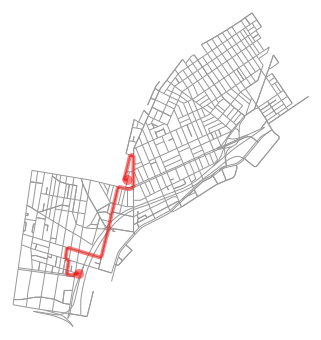

In [53]:
ox.plot_graph_route(G_nolibs_fishtown, route, node_size=0);

## Part 2: Interactive maps in Python

Haven't we already done this?

## Yes!

We've used holoviews/geoviews/datashader to create interactive map-based visualizations

## Why do we need something more?

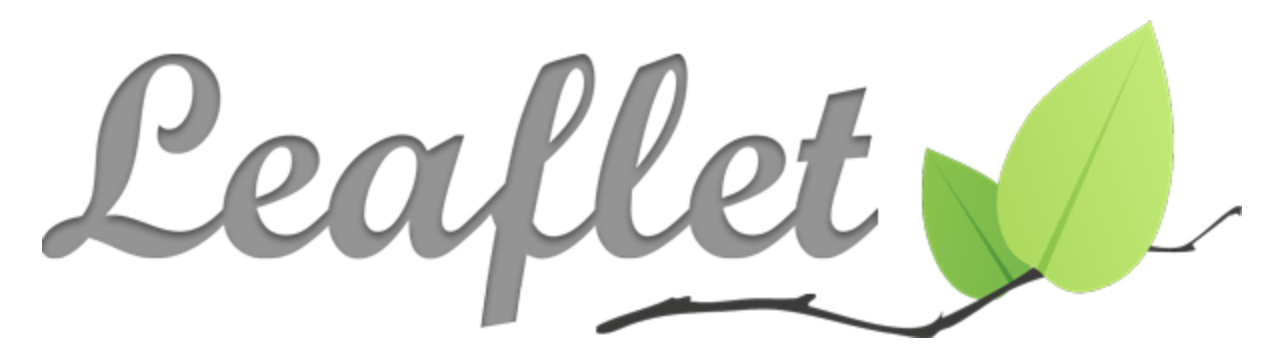</img>

## The benefits of Leaflet

- The leading open-source mapping library
- Simple and powerful
- Leverage the open-source community and lots of powerful plugins

## Folium: Leaflet in Python

**Pros**
- Create Leaflet.js maps directly from Python
- Combine power of Leaflet.js with the data wrangling ease of Python

**Cons**
- A wrapper for **most, but not all** of Leaflet's functionality
- Can be difficult to debug and find errors

## Let's start with a quick example: OSMnx

OSMnx leverages Folium under the hood to make interactive graphs of street networks!

Load the street network around City Hall

In [54]:
G = ox.graph_from_address('City Hall, Philadelphia, USA', 
                          distance=1500, network_type='drive')

**Key function:** `ox.plot_graph_folium` will make an interactive map of the graph object

In [55]:
# plot the street network with folium
graph_map = ox.plot_graph_folium(G, 
                                 popup_attribute='name', 
                                 edge_width=2)

In [56]:
type(graph_map)

folium.folium.Map

And now save the map object and load it into the Jupyter notebook

In [57]:
from IPython.display import IFrame # loads HTML files

In [58]:
filepath = 'graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

## Example: interactive maps of network routes

We can overlay the shortest route between two nodes on the folium map.

In [59]:
# two points in Northern Liberties / Fishtown
art_museum = (39.9655697, -75.1809661)
liberty_bell = (39.9496103, -75.1524761)

# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, art_museum) 
dest_node = ox.get_nearest_node(G, liberty_bell) 

# calculate the shortest path between these nodes
route = nx.shortest_path(G, orig_node, dest_node)

**Key function**: use `ox.plot_route_folium` to plot the route.

In [60]:
# plot the route with folium
route_map = ox.plot_route_folium(G, route)

In [61]:
filepath = 'route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)

We can also add the underlying street network graph

In [62]:
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(G, route, route_map=graph_map)

In [63]:
# save as html file then display map as an iframe
filepath = 'route_graph.html'
route_graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

Note the `Leaflet` annotation in the bottom right corner of the maps...

## Getting started with Folium

**Things we'll cover:**
1. Creating a base map with tiles
1. Overlaying GeoJSON polygons
1. Plotting an interactive choropleth

In [64]:
import folium

## 1. Creating a Folium map

**Key function:** `folium.Map`

## Lots of configuration options

Some key ones: 
- **location**: the center location of the map
- **zoom_start**: the initial zoom level of the map
- **tiles**: the name of the tile provider 

Let's take a look at the help message:

In [65]:
folium.Map?

## The default tiles: OpenStreetMap

In [66]:
# let's center the map on Philadelphia
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11
)

m

In [67]:
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11,
     tiles='stamenwatercolor'
)

m

## Using custom tile sets

- Many sites provide free tile sets for download
- Just need the URL of the tile server
- Very useful demo of tile providers: https://leaflet-extras.github.io/leaflet-providers/preview

Let's try out the ESRI World Map:

**Important: for custom tile providers, you need to specify the attribution too!** 

In [68]:
tile_url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}'
attr = 'Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012'

In [69]:
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11,
    tiles=tile_url,
    attr=attr
)

m

## 2. Overlaying GeoJSON on a folium map

**Key function:** `folium.GeoJson`

**Key parameters:**
- `style_function`: set the default style of the features
- `highlight_function`: set the style when the mouse hovers over the features 
- `tooltip`: add a tooltip when hovering over a feature

In [70]:
folium.GeoJson?

In [71]:
folium.GeoJsonTooltip?

## Example: Philadelphia ZIP codes

In [72]:
# Open Data Philly
zip_url = "http://data.phl.opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson"
zip_codes = gpd.read_file(zip_url)

In [73]:
zip_codes.head()

OBJECTID   CODE  COD   Shape__Area  Shape__Length  \
0         1  19120   20  9.177970e+07   49921.544063   
1         2  19121   21  6.959879e+07   39534.887217   
2         3  19122   22  3.591632e+07   24124.645221   
3         4  19123   23  3.585175e+07   26421.728982   
4         5  19124   24  1.448080e+08   63658.770420   

                                            geometry  
0  POLYGON ((-75.11107 40.04682, -75.11206 40.047...  
1  POLYGON ((-75.19227 39.99463, -75.19240 39.994...  
2  POLYGON ((-75.15406 39.98601, -75.15494 39.986...  
3  POLYGON ((-75.15190 39.97056, -75.15258 39.970...  
4  POLYGON ((-75.09660 40.04249, -75.09661 40.042...

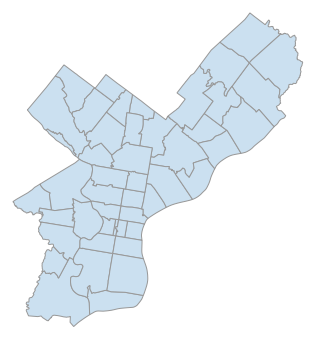

In [74]:
ox.plot_shape(ox.project_gdf(zip_codes));

Define functions to set the styles:

In [75]:
def get_style(feature):
    return {'weight': 2, 'color': 'white'}

def get_highlighted_style(feature):
    return {'weight': 2, 'color': 'red'}

## Usual Leaflet/Folium syntax

1. Create the map
2. Create your overlay layer
3. Add your overlay layer to your map

In [76]:
# create the map
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb dark_matter',
    zoom_start=11
)

# add the GeoJson to the map
folium.GeoJson(
    zip_codes.to_json(),
    name='Philadelphia ZIP_codes',
    style_function=get_style,
    highlight_function=get_highlighted_style,
    tooltip=folium.GeoJsonTooltip(['CODE'])
).add_to(m)


folium.GeoJson(
    zip_codes.to_json(),
    name='Philadelphia ZIP codes 2',
    style_function=get_style,
    highlight_function=get_highlighted_style,
    tooltip=folium.GeoJsonTooltip(['CODE'])
).add_to(m)


# also add option to toggle layers
folium.LayerControl().add_to(m)

m

## Important notes:

- The data should be passed as GeoJSON rather than a GeoDataFrame — you need to call `.to_json()`
- I've added a `LayerControl` to toggle different layers on the map
- I've specified a tooltip using `folium.GeoJsonTooltip`

## 3. Plotting a choropleth map

Overlay GeoJSON features on an interactive map, colored by a specific data variable

## Let's load some census data

Load data for internet availability in US counties:

In [77]:
census_data = pd.read_csv("data/acs5_2017_internet_counties.csv")

In [78]:
census_data.head()

geoid                                  name  universe  internet_any_source  \
0  72047        Corozal Municipio, Puerto Rico   11026.0               5218.0   
1  72095        Maunabo Municipio, Puerto Rico    3976.0               1586.0   
2  72111       Peñuelas Municipio, Puerto Rico    7132.0               3877.0   
3  72113          Ponce Municipio, Puerto Rico   53341.0              25481.0   
4  72131  San Sebastián Municipio, Puerto Rico   14278.0               4873.0   

   dialup_only  broadband_any_source  cellular_data  cellular_data_only  \
0        197.0                5021.0         4088.0              2381.0   
1          9.0                1577.0          987.0               434.0   
2          0.0                3877.0         3090.0              1361.0   
3        270.0               25211.0        17691.0              5613.0   
4        130.0                4743.0         2737.0              1525.0   

   broadband_cable_fiber_or_dsl  broadband_only  satellite  satellite_only  \
0                        2268.0           706.0      361.0           161.0   
1                        1078.0           512.0       77.0            37.0   
2                        2329.0           736.0      181.0            27.0   
3                       18366.0          6802.0     1210.0           510.0   
4                        2446.0          1335.0      829.0           456.0   

   other_only  internet_without_subscription  no_internet  county  state  
0         8.0                          122.0       5686.0      47     72  
1        14.0                          233.0       2157.0      95     72  
2         7.0                          283.0       2972.0     111     72  
3        61.0                         2818.0      25042.0     113     72  
4        74.0                          783.0       8622.0     131     72

In [79]:
# remove counties with no households
valid = census_data['universe'] > 0
census_data = census_data.loc[valid]

# calculate the percent without internet
census_data['percent_no_internet'] = census_data['no_internet'] / census_data['universe']

# make sure geoid is a string
census_data['geoid'] = census_data['geoid'].astype(str)

Load the US counties GeoJSON (from folium's GitHub):

In [80]:
url = "https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json"
counties = gpd.read_file(url)

In [81]:
counties.head()

id     name                                           geometry
0  1001  Autauga  POLYGON ((-86.41179 32.70634, -86.41179 32.410...
1  1003  Baldwin  POLYGON ((-87.76459 31.29877, -87.61671 31.244...
2  1005  Barbour  POLYGON ((-85.35474 32.14769, -85.05350 32.065...
3  1007     Bibb  POLYGON ((-87.06354 33.24856, -87.02520 33.248...
4  1009   Blount  POLYGON ((-86.48846 34.26179, -86.45560 34.261...

## Now let's make the choropleth..

## The easy way: use folium.Choropleth

- **The good:** 
    - Automatically generate a choropleth from a set of features and corresponding pandas DataFrame
    - Automatic creation of a legend
- **The bad:** 
    - no tooltip and little highlight interactivity (currently being worked on)

In [82]:
folium.Choropleth?

In [83]:
m = folium.Map(location=[40, -98], zoom_start=4)

# column names to match on
data_id = 'geoid'
json_id = 'id'

folium.Choropleth(
    geo_data=counties.to_json(),
    name='choropleth',
    data=census_data,
    columns=[data_id, 'percent_no_internet'],
    key_on='feature.properties.%s' % json_id, # need to use the "feature.properties." syntax
    fill_color='RdPu', # any ColorBrewer name will work here
    fill_opacity=0.7,
    line_opacity=1,
    line_weight=0.5,
    legend_name='Households without Internet (%)'
).add_to(m)


m

## The hard way: use folium.GeoJson

- **The good:**
    - more customizable, and can add user interaction
- **The bad:**
    - requires more work
    - no way to add a legend, see [this open issue on GitHub](https://github.com/python-visualization/folium/issues/528)

## The steps involved

1. Join data and features
1. Define a function to style features based on data values
1. Create GeoJSON layer and add it to the map

## Step 1: Join the census data and features

In [84]:
census_joined = pd.merge(counties[['id', 'geometry']], census_data, left_on='id', right_on='geoid')

In [85]:
census_joined.head()

id                                           geometry geoid  \
0  1001  POLYGON ((-86.41179 32.70634, -86.41179 32.410...  1001   
1  1003  POLYGON ((-87.76459 31.29877, -87.61671 31.244...  1003   
2  1005  POLYGON ((-85.35474 32.14769, -85.05350 32.065...  1005   
3  1007  POLYGON ((-87.06354 33.24856, -87.02520 33.248...  1007   
4  1009  POLYGON ((-86.48846 34.26179, -86.45560 34.261...  1009   

                      name  universe  internet_any_source  dialup_only  \
0  Autauga County, Alabama   21054.0              16201.0         70.0   
1  Baldwin County, Alabama   76133.0              57362.0        621.0   
2  Barbour County, Alabama    9191.0               5390.0        132.0   
3     Bibb County, Alabama    6916.0               4307.0         21.0   
4   Blount County, Alabama   20690.0              13881.0        275.0   

   broadband_any_source  cellular_data  cellular_data_only  \
0               16131.0        11341.0              2216.0   
1               56741.0        38708.0              9807.0   
2                5258.0         3275.0              1183.0   
3                4286.0         2964.0              1485.0   
4               13606.0         8082.0              2229.0   

   broadband_cable_fiber_or_dsl  broadband_only  satellite  satellite_only  \
0                       12703.0          4233.0     1348.0           449.0   
1                       43931.0         16004.0     5366.0          1045.0   
2                        3497.0          1556.0      794.0           273.0   
3                        2244.0           977.0      776.0           263.0   
4                       10282.0          4759.0     1520.0           437.0   

   other_only  internet_without_subscription  no_internet  county  state  \
0        29.0                          467.0       4386.0       1      1   
1        87.0                         3955.0      14816.0       3      1   
2        19.0                          423.0       3378.0       5      1   
3        18.0                          248.0       2361.0       7      1   
4        13.0                          619.0       6190.0       9      1   

   percent_no_internet  
0             0.208321  
1             0.194607  
2             0.367533  
3             0.341382  
4             0.299178

## Step 2: Normalize the data column to 0 to 1

We will use a matplotlib colorbar and it requires data to be between 0 and 1

In [86]:
x = census_joined['percent_no_internet']
census_joined['percent_no_internet_normalized'] = (x - x.min()) / (x.max() - x.min())

## Step 3: Define a style function

- create a matplotlib colorbar
- based on the feature data, evaluate the colorbar and convert to a hex string

In [87]:
# We'll use this module to convert from RGB to hex color formats
import matplotlib.colors as mcolors

In [88]:
# use a red-purple colorbrewer color scheme
cmap = plt.get_cmap('RdPu')

In [91]:
# EXAMPLE: min color
cmap(0.0)

(1.0, 0.9686274509803922, 0.9529411764705882, 1.0)

In [ ]:
# EXAMPLE: midpoint of colormap
cmap(0.5)

In [92]:
# EXAMPLE: max color
cmap(1.0)

(0.28627450980392155, 0.0, 0.41568627450980394, 1.0)

In [94]:
# EXAMPLE: Convert from rgb to hex
mcolors.rgb2hex(cmap(0))

'#fff7f3'

In [95]:
## PUT IT ALL TOGETHER IN ONE FUNCTION

def get_style(feature):
    # get the data value from the feature
    value = feature['properties']['percent_no_internet_normalized']
    
    # evaluate the color map
    # NOTE: value must between 0 and 1
    rgb_color = cmap(value) # this is a RGB tuple
    
    # convert to hex string
    color = mcolors.rgb2hex(rgb_color)
    
    # return the style dictionary
    return {'weight': 0.25, 'color': color, 'fillColor': color, "fillOpacity": 0.75}

## Step 4: Convert our data to GeoJSON

**Be sure to only keep the data columns we'll actually use!**

In [96]:
needed_cols = ['name', 'percent_no_internet', 'percent_no_internet_normalized', 'geometry']
census_json = census_joined[needed_cols].to_json()

In [97]:
# initialize the map
m = folium.Map(location=[40, -98], zoom_start=4)

# add the GeoJson to the map
folium.GeoJson(
    census_json,
    name='choropleth',
    style_function=get_style,
    highlight_function=get_highlighted_style,
    tooltip=folium.GeoJsonTooltip(['name', 'percent_no_internet'])
).add_to(m)


folium.LayerControl().add_to(m)

# avoid a rendering bug by saving as HTML and re-loading
m.save('percent_no_internet.html')

## And viola! 

The hard way is **harder**, but we have a tooltip and highlight interactivity!

In [98]:
IFrame('percent_no_internet.html', width=800, height=500)

## Exercise: Can we repeat this with altair?

Try to replicate the above interactive map exactly (minus the background tiles). This includes:

- Using the blue purple colorbrewer scheme
- Having a tooltip with the percentage and county name

**Hints**
- As we have done before, you'll need to use `alt.InlineData` as your data object that is passed to the Chart
- See [altair documentation](https://altair-viz.github.io/user_guide/customization.html#color-schemes) on changing the color scheme and the [Vega documentation](https://vega.github.io/vega/docs/schemes/#reference) for the names of the allowed color schemes in altair
- You'll want to specify the projection type as "albersUsa" 

In [99]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

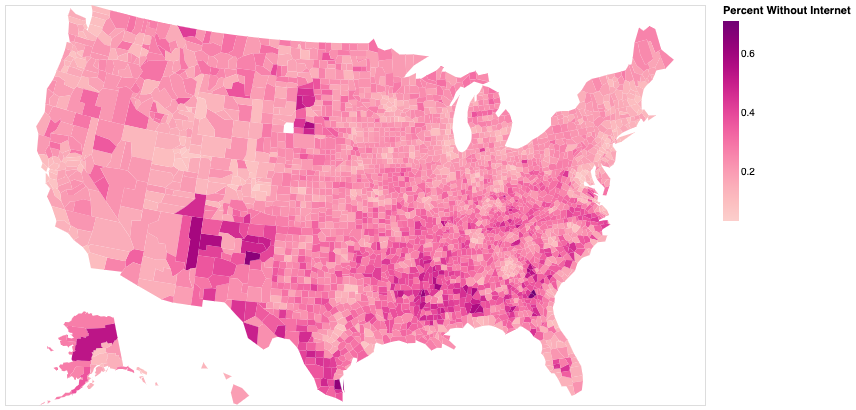

In [101]:
data = alt.InlineData(
    values=census_json, format=alt.DataFormat(property="features", type="json")
)

# plot map, where variables ares nested within `properties`,
alt.Chart(data).mark_geoshape().properties(
    width=700, height=400, projection={"type": "albersUsa"}
).encode(
    tooltip=[
        alt.Tooltip("properties.name:N", title="Name"),
        alt.Tooltip(
            "properties.percent_no_internet:Q",
            title="Percent Without Internet",
            format=".1%",
        ),
    ],
    color=alt.Color(
        "properties.percent_no_internet:Q",
        title="Percent Without Internet",
        scale=alt.Scale(scheme="redpurple"),
    ),
)

## Leaflet/Folium plugins

One of leaflet's strengths: a rich set of open-source plugins

https://leafletjs.com/plugins.html

Many of these are available in Folium!

## Example: Heatmap

In [102]:
from folium.plugins import HeatMap

## Exercise: Let's pull shooting data in Philadelphia in the last 90 days

- Available from OpenDataPhilly: https://www.opendataphilly.org/dataset/shooting-victims
- Let's query the database API directly to get the GeoJSON
- We can use the `carto2gpd` package to get the data
- API documentation: https://cityofphiladelphia.github.io/carto-api-explorer/#shootings

### Tips

- you can use the "current_date" variable (built in to the SQL database) to get the current date
- For example, to get the shootings from the past 7 days, we could do:

``SELECT * FROM shootings WHERE date_ >= current_date - 7``

In [103]:
import carto2gpd

In [104]:
# params
url = "https://phl.carto.com/api/v2/sql"
table_name = "shootings"
where = "date_ >= current_date - 90"

features = carto2gpd.get(url, table_name, where=where)

In [105]:
features.head()

geometry  objectid  year        dc_key  code  \
0  POINT (-75.18362 40.05446)      2077  2019  201939067471  0411   
1  POINT (-75.15777 39.92028)      2098  2019  201903055044  0111   
2  POINT (-75.17155 39.98506)      2099  2019  201922068124  0411   
3  POINT (-75.17155 39.98506)      2100  2019  201922068127  0411   
4  POINT (-75.17155 39.98506)      2101  2019  201922068148  0411   

                  date_ race sex age wound  ... offender_deceased  \
0  2019-08-05T00:00:00Z    B   M  37  back  ...                 N   
1  2019-08-05T00:00:00Z    B   M  25  head  ...                 N   
2  2019-08-05T00:00:00Z    B   M  19  legs  ...                 N   
3  2019-08-05T00:00:00Z    B   F  25  legs  ...                 N   
4  2019-08-05T00:00:00Z    B   M  28  legs  ...                 N   

                   location latino    point_x    point_y  dist      time  \
0    6700 BLOCK Musgrave St      0 -75.183622  40.054463    39  16:59:00   
1  2300 BLOCK S Marshall St      0 -75.157772  39.920278    03  20:14:00   
2    2300 BLOCK W Norris St      0 -75.171547  39.985062    22  21:57:00   
3    2300 BLOCK W Norris St      0 -75.171547  39.985062    22  22:27:00   
4    2300 BLOCK W Norris St      0 -75.171547  39.985062    22  23:58:00   

  inside outside  fatal  
0      0       1      0  
1      0       1      1  
2      0       1      0  
3      0       1      0  
4      0       1      0  

[5 rows x 22 columns]

In [106]:
# remove missing
features = features.loc[features.geometry.notnull()]

## Now let's make our heatmap

**Note: We need an array of (latitude, longitude) pairs. Be careful about the order!**

In [107]:
# extract the lat and longitude from the geometery column
features['lat'] = features.geometry.y
features['lng'] = features.geometry.x

# make a NumPy array (use the "values" attribute)
coordinates = features[['lat', 'lng']].values

In [108]:
coordinates[:5]

array([[ 40.054463, -75.183622],
       [ 39.920278, -75.157772],
       [ 39.985062, -75.171547],
       [ 39.985062, -75.171547],
       [ 39.985062, -75.171547]])

In [109]:
# initialize map
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb Positron',
    zoom_start=11
)


# add heat map
HeatMap(coordinates).add_to(m)

m

## Part 3:  Pandana

"Pandas Network Analysis - dataframes of network queries, quickly"

A complementary set of OSM-related features: 
- Downloading OSM-based networks
- Extracting amenity data (so-called "Points of Interest")
- Calculating network-constrained distances

- [GitHub](https://github.com/UDST/pandana)
- [Jupyter Notebook Examples](https://github.com/UDST/pandana/tree/master/examples)
- [Documentation](http://udst.github.io/pandana/)

In [110]:
import pandana as pnda
from pandana.loaders import osm

## Step 1: Get amenity data

Key function: `osm.node_query()`

This will extract amenities within a given bounding box.

In [111]:
osm.node_query?

Get the bounding box for Northern Liberties / Fishtown:

In [112]:
boundary = nolibs_fishtown.bounds
boundary

(-75.1489116033942, 39.9554656766062, -75.1132272693732, 39.9847647765491)

In [113]:
[lng_min, lat_min, lng_max, lat_max] = boundary

In [114]:
# query OSM
poi_df = osm.node_query(lat_min, lng_min, lat_max, lng_max)

# remove missing data
poi_df = poi_df.dropna(subset=['amenity'])

In [115]:
poi_df.head()

lat        lon highway old_ref  ref noref railway  \
id                                                                   
357274893  39.972335 -75.130176     NaN     NaN  NaN   NaN     NaN   
357280489  39.969835 -75.126565     NaN     NaN  NaN   NaN     NaN   
357283515  39.976224 -75.116842     NaN     NaN  NaN   NaN     NaN   
357288962  39.979279 -75.127121     NaN     NaN  NaN   NaN     NaN   
357292065  39.984557 -75.134065     NaN     NaN  NaN   NaN     NaN   

          traffic_signals crossing ele  ... entrance office currency:ETH  \
id                                      ...                                
357274893             NaN      NaN   7  ...      NaN    NaN          NaN   
357280489             NaN      NaN   5  ...      NaN    NaN          NaN   
357283515             NaN      NaN   4  ...      NaN    NaN          NaN   
357288962             NaN      NaN   8  ...      NaN    NaN          NaN   
357292065             NaN      NaN  11  ...      NaN    NaN          NaN   

          currency:LTC currency:XBT drive_through tower:type departures_board  \
id                                                                              
357274893          NaN          NaN           NaN        NaN              NaN   
357280489          NaN          NaN           NaN        NaN              NaN   
357283515          NaN          NaN           NaN        NaN              NaN   
357288962          NaN          NaN           NaN        NaN              NaN   
357292065          NaN          NaN           NaN        NaN              NaN   

          surface facebook  
id                          
357274893     NaN      NaN  
357280489     NaN      NaN  
357283515     NaN      NaN  
357288962     NaN      NaN  
357292065     NaN      NaN  

[5 rows x 129 columns]

In [116]:
len(poi_df)

155

In [117]:
poi_df[['lat', 'lon', 'amenity']].head(10)

lat        lon           amenity
id                                               
357274893  39.972335 -75.130176            school
357280489  39.969835 -75.126565            school
357283515  39.976224 -75.116842            school
357288962  39.979279 -75.127121            school
357292065  39.984557 -75.134065            school
357297150  39.983168 -75.141566            school
357297875  39.982335 -75.133510            school
357303425  39.960668 -75.147121               bar
357307010  39.963827 -75.144182  place_of_worship
357307221  39.981509 -75.118768            school

## Explore the amenities in this region

For the full list of amenities, see the [OSM Wikipedia](https://wiki.openstreetmap.org/wiki/Key:amenity)

In [118]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

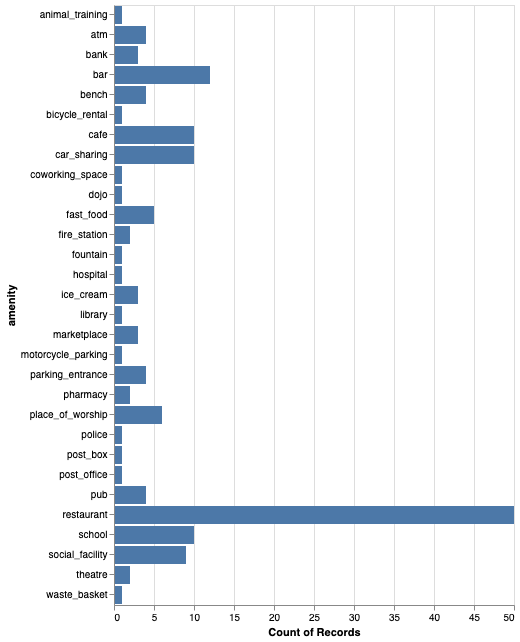

In [119]:
chart = (
    alt.Chart(poi_df)
    .mark_bar()
    .encode(y="amenity", x="count()", tooltip=["amenity", "count()"])
)

chart

## Step 2: Create a Pandana network

- Key function: `pdna_network_from_bbox()` 
- It takes a bounding box and returns the OSM network within that region. 
- Multiple network types: 'walk' and 'drive'

In [120]:
net = osm.pdna_network_from_bbox(
    lat_min, lng_min, lat_max, lng_max, network_type="walk"
)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](39.95546568,-75.14891160,39.98476478,-75.11322727);>;);out;'}"
Downloaded 906.1KB from www.overpass-api.de in 2.38 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 2.41 seconds
Returning OSM data with 4,942 nodes and 1,394 ways...
Edge node pairs completed. Took 6.05 seconds
Returning processed graph with 2,284 nodes and 3,575 edges...
Completed OSM data download and Pandana node and edge table creation in 8.76 seconds


## Step 3: Tell the network the location of amenities

Key function: `network.set_pois()`

In [141]:
# sensible defaults
max_distance = 2000  # in meters
num_pois = 10  # only need the 10 nearest POI to each point in the network

# Tell the network where all the types of amenities are
amenities = poi_df['amenity'].unique()
for amenity in amenities:

    # get the subset of amenities for this type
    pois_subset = poi_df[poi_df["amenity"] == amenity]

    # set the POI, using the longitude and latitude of POI
    net.set_pois(
        amenity, max_distance, num_pois, pois_subset["lon"], pois_subset["lat"]
    )

In [142]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (lat_max - lat_min) / (lng_max - lng_min)
fig_kwargs = {"facecolor": "w", "figsize": (10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {"s": 20, "alpha": 0.9, "cmap": "viridis_r", "edgecolor": "none"}

## Step 4: plot the walking distance to the nearest POI

For every point on the network, find the nth nearest POI, calculate the distance, and color that point according to the distance.

1. Use `network.nearest_poi()` to get distances from nodes to nearest POIs
1. Merge coordinates of network nodes with distances to nearest POIs
1. Plot the node coordinates, colored by distance to nth nearest POI

### 1. Use `network.nearest_poi()` to get distances from nodes to nearest POIs

In [143]:
amenity = 'bar'
access = net.nearest_pois(distance=1000, category=amenity, 
                          num_pois=num_pois)

In [144]:
access.head(n=20)

1            2            3            4            5   \
id                                                                           
103353219  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103357134  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103357139  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103407531  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103407534  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103417453  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103426172  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103426218  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103439886  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103449512  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103455424  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
103455428  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
109729330   550.346008   870.026001  1000.000000  1000.000000  1000.000000   
109729372   422.503998   742.184021  1000.000000  1000.000000  1000.000000   
109729430   456.153992   513.140991   608.002991   610.737976   636.344971   
109729453   420.438995   553.943970   600.973022   619.364990   648.051025   
109729661   480.753998   800.434021  1000.000000  1000.000000  1000.000000   
109729673   414.279999   733.960022  1000.000000  1000.000000  1000.000000   
109729699   304.230988   623.911011   911.791016   911.791016  1000.000000   
109729709   216.554993   536.234985   824.114990   824.114990   987.039001   

                    6            7            8            9            10  
id                                                                          
103353219  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103357134  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103357139  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103407531  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103407534  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103417453  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103426172  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103426218  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103439886  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103449512  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103455424  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
103455428  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
109729330  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
109729372  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
109729430   636.344971   665.969971   717.155029   745.841003   932.004028  
109729453   705.793030   708.528015   734.135010   734.135010   839.302002  
109729661  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
109729673  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
109729699  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
109729709  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000

### 2. Merge coordinates of network nodes with distances to nearest POIs

In [145]:
net.nodes_df.head()

x          y
id                             
103353219 -75.115434  39.957472
103357134 -75.114734  39.954193
103357139 -75.113843  39.957221
103407531 -75.120641  39.955889
103407534 -75.119286  39.955627

In [146]:
access.head()

1       2       3       4       5       6       7       8   \
id                                                                          
103353219  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
103357134  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
103357139  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
103407531  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
103407534  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   

               9       10  
id                         
103353219  1000.0  1000.0  
103357134  1000.0  1000.0  
103357139  1000.0  1000.0  
103407531  1000.0  1000.0  
103407534  1000.0  1000.0

In [147]:
def to_geopandas(df, xcol='x', ycol='y'):
    """
    Utility function to convert from DataFrame to GeoDataFrame
    """
    from shapely.geometry import Point
    
    df['geometry'] = df.apply(lambda row: Point(row[xcol], row[ycol]), axis=1)
    return gpd.GeoDataFrame(df, geometry='geometry', crs={'init':'epsg:4326'})

In [148]:
nodes = pd.merge(net.nodes_df, access, left_index=True, right_index=True)    
nodes = to_geopandas(nodes)

In [149]:
nodes.head()

x          y       1       2       3       4       5  \
id                                                                        
103353219 -75.115434  39.957472  1000.0  1000.0  1000.0  1000.0  1000.0   
103357134 -75.114734  39.954193  1000.0  1000.0  1000.0  1000.0  1000.0   
103357139 -75.113843  39.957221  1000.0  1000.0  1000.0  1000.0  1000.0   
103407531 -75.120641  39.955889  1000.0  1000.0  1000.0  1000.0  1000.0   
103407534 -75.119286  39.955627  1000.0  1000.0  1000.0  1000.0  1000.0   

                6       7       8       9      10                    geometry  
id                                                                             
103353219  1000.0  1000.0  1000.0  1000.0  1000.0  POINT (-75.11543 39.95747)  
103357134  1000.0  1000.0  1000.0  1000.0  1000.0  POINT (-75.11473 39.95419)  
103357139  1000.0  1000.0  1000.0  1000.0  1000.0  POINT (-75.11384 39.95722)  
103407531  1000.0  1000.0  1000.0  1000.0  1000.0  POINT (-75.12064 39.95589)  
103407534  1000.0  1000.0  1000.0  1000.0  1000.0  POINT (-75.11929 39.95563)

### And now plot it!

Let's define a function to do this for us, since we'll repeat this plot multiple times

In [150]:
def plot_walking_distance(net, amenity, distance=1000, n=1):
    """
    Plot the walking distance to the specified amenity
    """
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    # subset of POI
    poi_subset = poi_df[poi_df['amenity']==amenity]
    
    # get the distances to nearest num_pois POI
    access = net.nearest_pois(distance=1000, category=amenity, num_pois=num_pois)

    # merge node positions and distances to nearest PO
    nodes = pd.merge(net.nodes_df, access, left_index=True, right_index=True)    
    nodes = to_geopandas(nodes)
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    # plot the distance to the nth nearest amenity
    ax = nodes.plot(ax=ax, cax=cax, column=nodes[n], legend=True, **plot_kwargs)
    
    # add the amenities as stars
    for i, row in poi_subset.iterrows():
        ax.scatter(row['lon'], row['lat'], color='red', s=100, marker='*')
    
    # format
    ax.set_facecolor('black')
    ax.figure.set_size_inches(fig_kwargs['figsize'])
    
    # set extent
    [xmin, ymin, xmax, ymax] = nodes.geometry.total_bounds
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    return ax

### Evaluating amenity choice

The difference between maps to the nearest amenity and for example, the 5th nearest amenity tells us about the options consumers have

## Example: bars

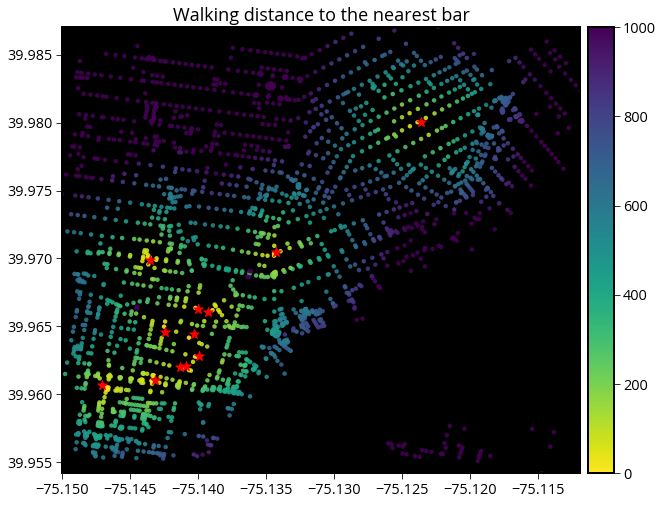

In [151]:
ax = plot_walking_distance(net, "bar", n=1)
ax.set_title("Walking distance to the nearest bar", fontsize=18);

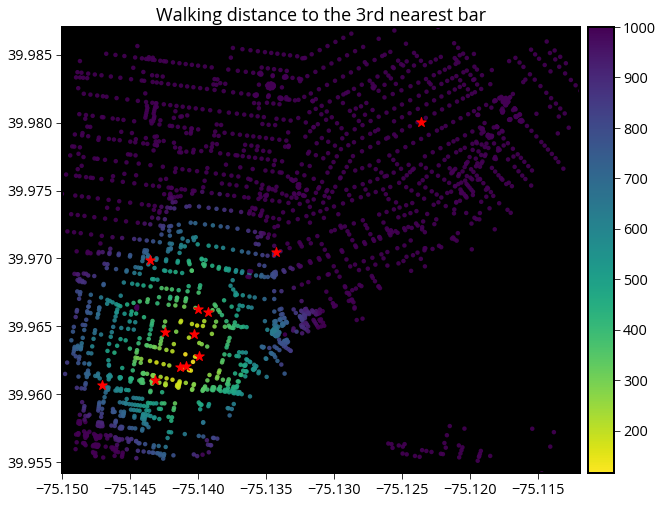

In [152]:
ax = plot_walking_distance(net, "bar", n=3)
ax.set_title("Walking distance to the 3rd nearest bar", fontsize=18);

## Example: schools

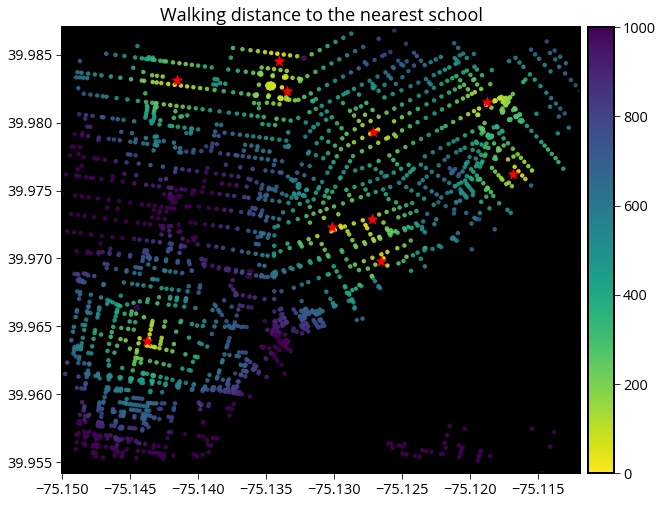

In [153]:
ax = plot_walking_distance(net, "school", n=1)
ax.set_title("Walking distance to the nearest school", fontsize=18);

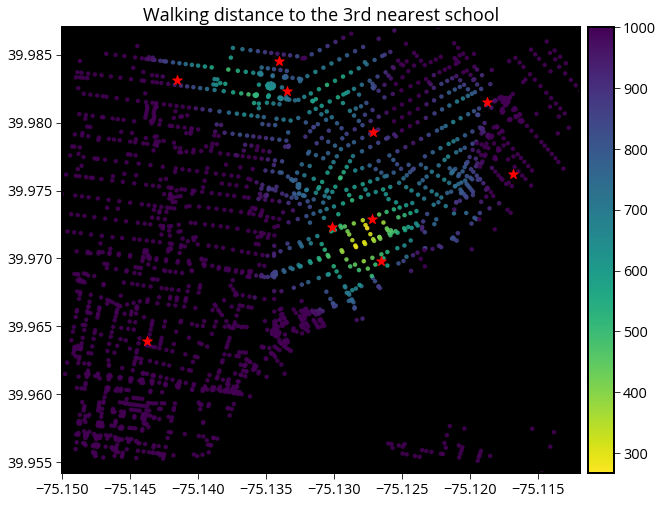

In [154]:
ax = plot_walking_distance(net, "school", n=3)
ax.set_title("Walking distance to the 3rd nearest school", fontsize=18);

## Example: restaurants

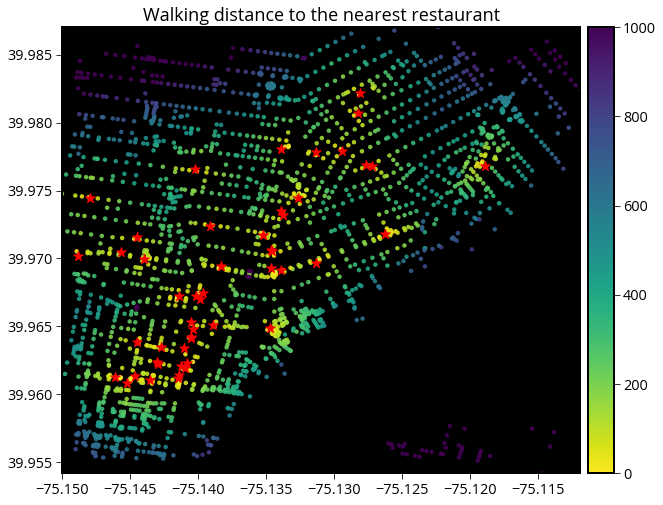

In [155]:
ax = plot_walking_distance(net, "restaurant", n=1)
ax.set_title("Walking distance to the nearest restaurant", fontsize=18);

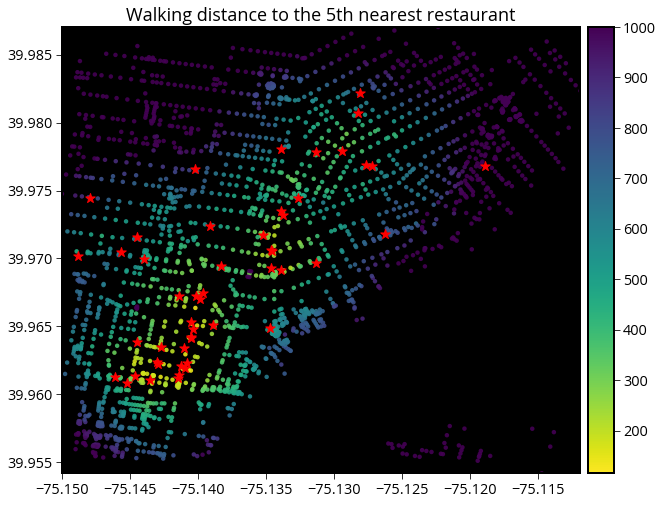

In [156]:
ax = plot_walking_distance(net, "restaurant", n=5)
ax.set_title("Walking distance to the 5th nearest restaurant", fontsize=18);

## Example: car sharing

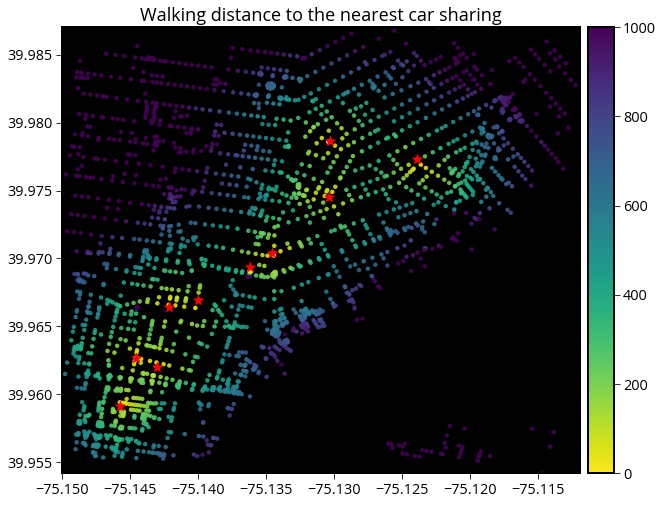

In [157]:
ax = plot_walking_distance(net, "car_sharing", n=1)
ax.set_title("Walking distance to the nearest car sharing", fontsize=18);

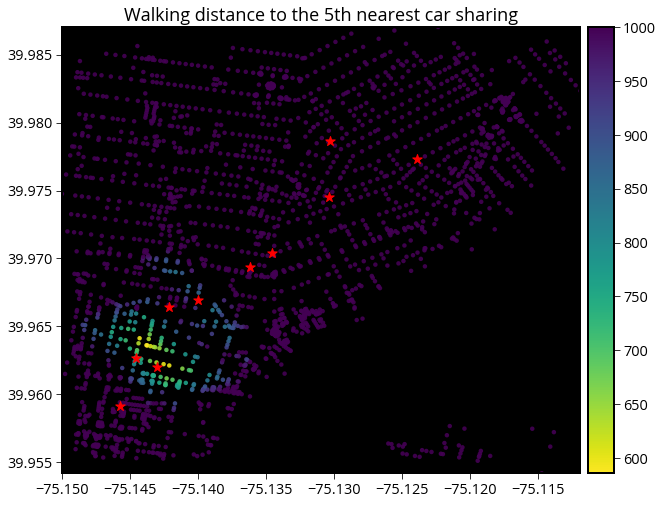

In [158]:
ax = plot_walking_distance(net, "car_sharing", n=5)
ax.set_title("Walking distance to the 5th nearest car sharing", fontsize=18);

## Exercise: explore amenities in the neighborhood of your choice

Many, many more amenities are logged throughout the city. Pick your favorite neighborhood and explore. 

See [this page](https://wiki.openstreetmap.org/wiki/Key:amenity) for the full list of amenities.